### Logistic Regression

In [285]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("dark_background")

#### Genearating data using numpy

In [286]:
# Using multivariate normal distribution

mean1 = np.array([1, 0.5])
cov1 = np.array([[1, 0.1], [0.1, 1.2]])

mean2 = np.array([4,5])
cov2 = np.array([[1.2, 0.1], [0.1, 1.3]])

dist1 = np.random.multivariate_normal(mean1, cov1, 500)
dist2 = np.random.multivariate_normal(mean2, cov2, 500)

dist1.shape

(500, 2)

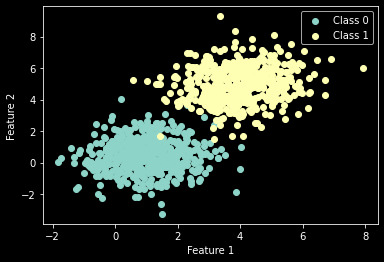

In [287]:
# Visualising
plt.scatter(dist1[:,0], dist1[:,1], label="Class 0")
plt.scatter(dist2[:,0], dist2[:,1], label="Class 1")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

#### Creating a data matrix

In [288]:
data = np.zeros((1000,3)) # x1, x2, y

In [289]:
data[:500, :2] = dist1
data[500:, :2] = dist2

data[500:, -1] = 1

In [290]:
data[:5, :], data[-5:, :]

(array([[ 0.451752  , -0.67216987,  0.        ],
        [ 0.74784252, -0.68055853,  0.        ],
        [ 1.32197295,  1.47482835,  0.        ],
        [ 0.47673231,  0.0698455 ,  0.        ],
        [ 0.6859502 ,  0.77966224,  0.        ]]),
 array([[3.51255349, 5.41456182, 1.        ],
        [4.27327805, 4.06100947, 1.        ],
        [4.46665097, 5.30464826, 1.        ],
        [4.04697725, 6.04843668, 1.        ],
        [4.52075769, 3.4113005 , 1.        ]]))

This is our sample data, but it is ordered, now we shuffle

In [291]:
np.random.shuffle(data)
data[:10, :]

array([[3.66620578, 3.95711708, 1.        ],
       [1.88890101, 1.39255718, 0.        ],
       [4.1324764 , 5.5876291 , 1.        ],
       [4.84637557, 5.75779017, 1.        ],
       [3.93890848, 5.44745893, 1.        ],
       [2.4536035 , 4.62461708, 1.        ],
       [1.05376521, 1.45224016, 0.        ],
       [4.90645207, 5.24352293, 1.        ],
       [3.96074382, 6.05519509, 1.        ],
       [1.74881701, 0.83447907, 0.        ]])

It is now shuffled

#### Splitting in test and train

In [292]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data[:, :-1], data[:, -1], test_size=0.2)

y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

x_train.shape, y_test.shape

((800, 2), (200, 1))

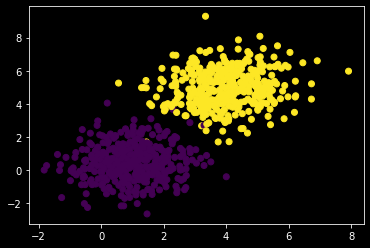

In [293]:
# Visualising the data
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)

We see we have a well defined train data

#### Normalising data

In [294]:
x_train = (x_train - x_train.mean(axis=0))/x_train.std(axis=0)

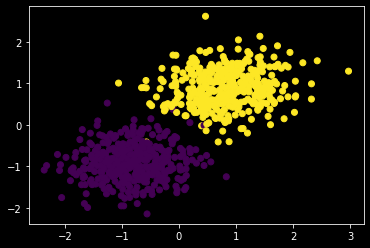

In [295]:
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)

Now we see the entire data has centered around 0, but the points are still similar

In [296]:
# Similar transformation on x_test

x_test = (x_test - x_test.mean(axis=0))/x_test.std(axis=0)

### Implementing Logistic Regression

In [297]:
def sigmoid(x):
    return 1.0/(1.0 + np.exp(-x))

def hypothesis(X, theta):
    return sigmoid(np.dot(X, theta))

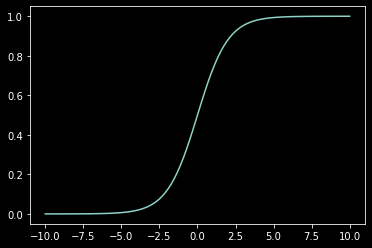

In [298]:
# Trying out the sigmoid function
a = np.linspace(-10, 10, 100)
plt.plot(a, sigmoid(a))
plt.show()

We get a nice sigmoid curve as showm, from 0 to 1

In [299]:
# Error function 
def error(X, y, theta):

    hi = hypothesis(X, theta)

    total_error = (y*np.log(hi)) + ((1-y)*(np.log(1 - hi)))

    return -1*np.mean(total_error)

In [300]:
def gradient(X, y, theta):

    hi = hypothesis(X, theta)
    grad = np.dot(X.T, y - hi)

    m = X.shape[0]
    return grad/m

def gradientDescent(X, y, lr = 0.1, max_steps = 500):
    
    m, n = X.shape
    theta = np.zeros((n,1))

    error_list = []

    for i in range(max_steps):

        err = error(X, y, theta)
        error_list.append(err)

        grad = gradient(X, y, theta)

        # Update
        theta = theta + lr * grad

    return theta, error_list


#### Preparing the data

In [301]:
ones = np.ones((x_train.shape[0], 1))
X_ = np.hstack((ones, x_train))

In [302]:
theta, error_list = gradientDescent(X_, y_train)

In [303]:
theta

array([[0.09356264],
       [2.18950714],
       [2.87641776]])

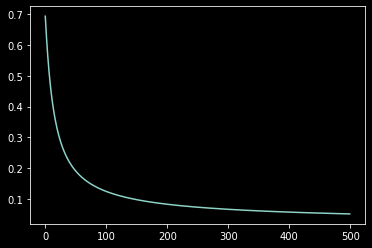

In [304]:
plt.plot(error_list)
plt.show()

#### Plotting the surface line

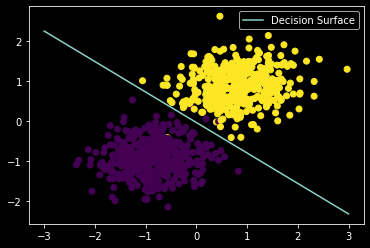

In [305]:
x1 = np.arange(-3,4)

x2 = -(theta[0] + theta[1]*x1)/theta[2]

plt.scatter(x_train[:, 0], x_train[:, 1], c = y_train)
plt.plot(x1, x2, label="Decision Surface")
plt.legend()
plt.show()

We see that our prediction is quite fine

### Prediction

In [306]:
def predict(X, theta):
    h = hypothesis(X, theta)
    output = np.zeros(h.shape)

    output[h >= 0.5] = 1

    return output

In [307]:
ones = np.zeros((x_test.shape[0], 1))
x_ = np.hstack((ones, x_test))

In [308]:
predict(x_, theta)[:5, :]

array([[0.],
       [0.],
       [0.],
       [0.],
       [1.]])

We are getting proper predictions

In [309]:
preds = predict(x_, theta)

In [310]:
def accuracy(actual, pred):
    actual = actual.astype('int')
    return np.sum(actual == pred)/actual.shape[0]

In [311]:
accuracy(y_test, preds)

0.985

We are getting 197 values out of 200 as correctly predicted

#### Logistic regression using SK-Learn

In [312]:
from sklearn.linear_model import LogisticRegression

In [313]:
model = LogisticRegression()

In [314]:
model.fit(x_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [315]:
theta_0 = model.intercept_
theta_1 = model.coef_

theta_0, theta_1

(array([0.14901243]), array([[2.89740914, 4.41191217]]))

In [316]:
theta

array([[0.09356264],
       [2.18950714],
       [2.87641776]])

Our values are somewhat similar

In [317]:
model.score(x_test, y_test)

0.99

We get a 99% score on our data using SK learn